## Variational Quantum Eigensolver (VQE)

$$ \newcommand{\braket}[1]{\left\langle{#1}\right\rangle} $$

The Variational Quantum Eigensolver (VQE), which aims for computing an upper bound for the ground-state energy of a given Hamiltonian, is one of the most promising NISQ algorithms. It is also possible to calculate excited states of a Hamiltonian using a modified technique (Variational Quantum Deflation (VQD)).

The basics steps are:
<ol>
    <li>
        prepare a "good ansatz" quantum state by applying a parameterized unitary transformation on the initial quantum state: $\ket{\psi(\vec{\theta})}=U(\vec{\theta}) \ket{0}$
    </li>
    <li>
        measure the energy expectation on a quantum computer as $E(\vec{\theta})=\braket{\psi(\vec{\theta})|H|\psi(\vec{\theta})}$ by measuring each Pauli string separately and summing the individual terms;
    </li>
    <li>
        update the parameters $\vec{\theta}=(\theta_1,\theta_2,\dots,\theta_n)^T$ to reduce the energy $E(\vec{\theta})$ using a classical optimization algorithm;
    </li>
    <li>
        repeat until the desired convergence is attained.
    </li>
</ol>

The objective function (cost function) is given by the expectation value of the Hamiltonian computed for the trial state. 
In most cases $H$ cannot measured directly (without the use of quantum phase estimation). So one relies on the linearity of expectation values to measure parts of $H$ when estimating the energy eigenvalue. 

One always needs to repeat the measurements to obtain an estimate of the expectation value. How many measurements are needed to achieve a given accuracy, can be estimated in many cases, but in general must be investigated by defining a condition to end the minimization loops.

The optimization is carried out by a classical optimizer, which calculate the gradient of the cost function at each optimization step; note that vanishing gradients may cause 'barren plateaus', which may be overcome by mitigation methods.

The choice of "good ansatz" trial states are usually based on hardware efficiency to reduce errors introduced by physical qubits. 
The Hamiltonian (of size $2^n \times 2^n$) is usually written as sum of Pauli operators and their tensor products - assuming efficient Pauli representation. 

It is crucial to choose the right optimization method for the given problem, e.g. BFGS (Broyden-Fletcher-Goldfarb-Shanno) or COBYLA (Constrained Optimization By Linear Approximation - a non-gradient based optimizer) or SLSQP (Sequential Least SQuare Programming optimizer) or Nelder-Mead or Powel (which performs unconstrained optimization).

### Example: anharmonic oscillator

Central features of the algebraic formulation of quantum theory are manifest in the treatment of the harmonic oscillator. 

Consider a perfect spring of mass $m$ and spring constant $k$, which is elastically elongated by a distance $A$, then the acting force $F=ma=m\frac{d^2x}{dt^2}=-kx$ results in a harmonic oscillation $x(t)=A\cos(\omega t)$ where $\omega\equiv 2\pi f=k/m$ is the angular velocity and $f$ the frequency of the oscillation. 
As the energy of this system is conserved ($E=E_{kin}+E_{pot}$), the oscillation can be viewed as continuous transformation between kinetic energy ($E_{kin}=\frac{m}{2} v^2=\frac{1}{2m} p^2$) and potential energy ($E_{pot}=\frac{k}{2} x^2=\frac{m\omega^2}{2} x^2$) with $p=mv$ and $v=\frac{dx}{dt}$. 

In quantum mechanics conjugate variables (Fourier-transform dual operators) like $P$ and $X$ are related by a commutator relation of form $[A,B]=i\hbar=\frac{ih}{2\pi}$, thus $[A^n,B]=i\hbar nA^{(n-1)}$; $[A,B^n]=i\hbar nB^{n-1}$, so $[X,P]=i\hbar$ and $[f(X),P]=i\hbar f'(X)$ for any analytic function $f(X)$, etc. <br>
The Hamiltonian operator for the harmonic oscillator potential is given by 
$$H=\frac{1}{2m}\mathbf{P}^2 + \frac{m\omega^2}{2}\mathbf{X}^2 = \frac{1}{2}\hat{P}^2+\frac{1}{2}\hat{X}^2 
\quad \quad \quad \mbox{where}\quad \hat{P}=P/\sqrt{\hbar\mu\omega} \quad\mbox{and}\quad \hat{X}=X/\sqrt{\hbar/(\mu\omega)}$$
Writing the sum of two squares in the form $A^2+B^2=(A-iB)(A+iB)-i[A,B]$, we can define an operator 
$a=\frac{1}{\sqrt{2}}(\hat{X}+i\hat{P})$, such that
$$H=\frac{1}{2}\hat{P}^2 + \frac{1}{2}\hat{X}^2=\hbar\omega\left(a^\dagger a + \frac{1}{2}\right)$$

Obviously, $\hat{X}=\frac{1}{\sqrt{2}}(a+a^\dagger)$ and $\hat{P}=\frac{i}{\sqrt{2}}(a-a^\dagger)$;
operator $a$ is not hermitian ($a\neq a^\dagger$) but their product is hermitian $a^\dagger a\equiv N$ is the number operator, which is diagonal in the "Fock" space: $N\ket{n}=n\ket{n}$. 

This gives us the eigenstate equation of the harmonic operator: $H\ket{n}=\hbar\omega(n+\frac{1}{2})\ket{n}$ with
eigenvalue $E_0=\frac{1}{2}\hbar\omega$ for eigenket $\ket{0}$.
Note that $E_0$ is the ground-state energy ($n<0$ is not allowed since $\braket{n|N|n}=(\bra{n}a^\dagger) (a\ket{n})=\braket{m|m}\ge 0$ for any $\ket{m}$).

The action of operators $a$ and $a^\dagger$ follows from their commutator relation: 
$$[a,a^\dagger]=1 \quad \to \quad
[N,a^\dagger]=a^\dagger \ , \ [N,a]=-a \quad \to \quad  a^\dagger \ket{n}=\sqrt{n+1}\ket{n+1}\ , \quad a\ket{n}=\sqrt{n}\ket{n-1}$$
thus $a^\dagger$ and $a$ are ladder operators, raising or lowering the energy eigenstates; 
they are also called creation and annihilation operators in the 2nd quantization. 

<br>
The Hamiltonian for an anharmonic oscillator is given by 
$$H'=\frac{1}{2} \hat{P}^2 + \frac{1}{2} \hat{X}^2 -g \hat{X}^3 +h \hat{X}^4 $$

The energy levels for a cubic anharmonic oscillator (with $h$=0) are given by 
$$E'_n=-\frac{g^2}{8}(30 n^2 + 30 n + 11) + O(g^4)$$

and the ground state energy is 
$$E'_0=\frac{1}{2}-\frac{11}{8}g^2-\frac{465}{32}g^4-\frac{39709}{128}g^6 + O(g^8)$$

In [1]:
import itertools
import functools as ft
import numpy as np
np.set_printoptions(precision=3, suppress=True)

eps = 1e-9  # discard values close to 0

# calculate harmonic and anharmonic oscillator matrix (in E basis)
def calculate_Hmatrix_AHO(g=0.02, h=0):
    nqubits = 3
    n = 2**nqubits
    A = np.diag(np.sqrt(range(1,n+1)),1)  # Annihilation operator 
    X = np.sqrt(0.5) * (A + A.conj().T) # Position operator  
    P = 1j/np.sqrt(2) * (A - A.conj().T) # Momentum operator  
    H0E = (A.conj().T @ A)[:n,:n] + 0.5 * np.eye(n)   # harmonic oscillator Hamiltonian  
    H1E =  (- g * np.linalg.matrix_power(X, 3) + h * np.linalg.matrix_power(X, 4))[:n,:n] 
    return H0E + H1E 

# decompose Hmatrix to sum of Paulistrings

# (a) prints list of Paulistring with coefficients if print_only=True
#     outputs list of strings "coeff * Paulistring" if print_only=False

def decompose_H_to_string(H, reversed_order=False, print_only=False):

    def HS(M1, M2):
        # Hilbert-Schmidt prod. of two matrices
        return np.trace((M1.conj().T) @ M2) 

    def c2s(c):
        if c == 0.0:
            return "0"
        if c.imag == 0:
            return "%g" % c.real
        elif c.real == 0:
            return "%gj" % c.imag
        else:
            return "%g+%gj" % (c.real, c.imag)

    sx = np.array([[0, 1],  [ 1, 0]], dtype=np.complex128)
    sy = np.array([[0, -1j],[1j, 0]], dtype=np.complex128)
    sz = np.array([[1, 0],  [0, -1]], dtype=np.complex128)
    id = np.array([[1, 0],  [ 0, 1]], dtype=np.complex128)
    S = [id, sx, sy, sz]
    labels = ["I", "X", "Y", "Z"]
    final = []
    nqubits=int(np.log2(np.shape(H)[0]))
    if nqubits == 2:
        for i, j in itertools.product(range(4),range(4)):
            a = (1/2**nqubits) * HS(np.kron(S[i], S[j]), H) 
            # Formula: (1/2^2) (Si otimes Sj) dot H
            if np.abs(a) > eps:
                if reversed_order:
                    term = f"{c2s(a)} * {labels[j]}^{labels[i]}"
                else:
                    term = f"{c2s(a)} * {labels[i]}^{labels[j]}"
                final.append(term)
    elif nqubits  == 3:
        for i, j, k in itertools.product(range(4),range(4),range(4)):
            a = (1/2**nqubits) * HS(np.kron(np.kron(S[i], S[j]),S[k]), H)
            if np.abs(a) > eps:
                if reversed_order:
                    term = f"{c2s(a)} * {labels[k]}^{labels[j]}^{labels[i]}"
                else:
                    term = f"{c2s(a)} * {labels[i]}^{labels[j]}^{labels[k]}"
                final.append(term)
    elif nqubits  == 4:
        for i, j, k, l in itertools.product(range(4),range(4),range(4),range(4)):
            a = (1/2**nqubits) * HS(np.kron(np.kron(S[i], S[j]),S[k],S[l]), H)
            if np.abs(a) > eps:
                if reversed_order:
                    term = f"{c2s(a)} * {labels[l]}^{labels[k]}^{labels[j]}^{label[i]}"
                else:
                    term = f"{c2s(a)} * {labels[i]}^{labels[j]}^{labels[k]}^{label[l]}"
                final.append(term)
    else:
        print(f"Not implemented for {nqubits} qubits")
    if print_only:
        if len(final) < 2:
            print(final)
        else:
            print(" + ".join([f"({st})" for st in final]))
    else:
        return final

# (b) alternative way
# returns list of coefficients and list of Paulistrings if return_labels=True
# returns list of coefficients and list of indices of Paulis if return_labels=False
#       (index=0: Id, index=1: Pauli-X, index=2: Pauli-Y, index=3: Pauli-Z)

def decompose_Pauli(H, reversed_order=False, return_labels=True):
    def numberToBase(n, b, n_qubits):
        if n == 0:
            return np.zeros(n_qubits,dtype=int)
        digits = np.zeros(n_qubits,dtype=int)
        counter = 0
        while n:
            digits[counter] = int(n % b)
            n //= b
            counter += 1
        return digits[::-1]

    sx = np.array([[0, 1],  [ 1, 0]], dtype=np.complex128)
    sy = np.array([[0, -1j],[1j, 0]], dtype=np.complex128)
    sz = np.array([[1, 0],  [0, -1]], dtype=np.complex128)
    id = np.array([[1, 0],  [ 0, 1]], dtype=np.complex128)
    S = [id, sx, sy, sz]
    S_label = ["I", "X", "Y", "Z"]    
    dim_matrix = np.shape(H)[0]
    n_qubits = int(np.log2(dim_matrix))
    if dim_matrix != 2**n_qubits:
        raise NameError("Matrix is not power of 2!")
    hilbertspace = 2**n_qubits
    n_paulis = 4**n_qubits
    pauli_list = np.zeros([n_paulis,n_qubits],dtype=int)
    for k in range(n_paulis):
        pauli_list[k,:] = numberToBase(k,4,n_qubits)
    weights = np.zeros(n_paulis, dtype=np.complex128)
    for k in range(n_paulis):
        pauli = S[pauli_list[k][0]]
        for n in range(1,n_qubits):
            pauli = np.kron(pauli,S[pauli_list[k][n]])
        weights[k] = 1/hilbertspace * np.dot(pauli,H).trace()
    coeffs = []
    paulistr = []
    for i in range(n_paulis):
        if np.abs(weights[i]) < eps:
            continue
        coeffs.append(weights[i])
        if reversed_order:
            tmplist = [j for j in reversed(pauli_list[i].tolist())]
        else:
            tmplist = pauli_list[i].tolist()
        if return_labels:
            paulistr.append("".join([ S_label[k] for k in tmplist ]))
        else:
            paulistr.append(tmplist)
    return coeffs, paulistr

# (c) yet another way
#  returns list of coefficients, list of Paulistrings, matrix form
#  if long_form, then the Paulistrings are of form: "PqPq..." where P is a Pauli and q the qubit number

def decompose_H_to_P(H, reversed_order=False, long_form=False):
    n = int(np.log2(len(H)))
    N = 2 ** n
    # Basic checks!
    if H.shape != (N, N):
        raise ValueError("The Hamiltonian should have shape (2**n, 2**n), for any qubit number n>=1")
    if not np.allclose(H, H.conj().T):
        raise ValueError("The Hamiltonian is not Hermitian")
    sI = np.eye(2, 2, dtype=complex)
    sX = np.array([[0, 1], [1, 0]], dtype=complex)
    sZ = np.array([[1, 0], [0,-1]], dtype=complex)
    sY = complex(0,-1)*np.matmul(sZ,sX)
    paulis = [sI, sX, sY, sZ]
    paulis_label = ["I", "X", "Y", "Z"]
    obs = []
    coeffs = []
    matrix = []
    for term in itertools.product(paulis, repeat=n):
        matrices = [pauli for pauli in term]
        coeff = np.trace(ft.reduce(np.kron, matrices) @ H) / N
        coeff = np.real_if_close(coeff).item()
        if not np.allclose(coeff, 0):
            coeffs.append(coeff)
            if reversed_order:
                if long_form:
                    obs.append("".join([paulis_label[[i for i, x in enumerate(paulis)
                        if np.all(x == t)][0]]+str(idx) for idx, t in enumerate(reversed(term))]))
                else:
                    obs.append("".join([paulis_label[[i for i, x in enumerate(paulis)
                        if np.all(x == t)][0]] for idx, t in enumerate(reversed(term))]))
            else:
                if long_form:
                    obs.append("".join([paulis_label[[i for i, x in enumerate(paulis)
                        if np.all(x == t)][0]]+str(n-1-idx) for idx, t in enumerate(term)]))
                else:
                    obs.append("".join([paulis_label[[i for i, x in enumerate(paulis)
                        if np.all(x == t)][0]] for idx, t in enumerate(term)]))
            matrix.append(ft.reduce(np.kron, matrices))
    return coeffs, obs, matrix


In [2]:
H = calculate_Hmatrix_AHO(0.02)
print(H)
decompose_H_to_string(H, print_only=True)
print(decompose_Pauli(H))
decompose_H_to_P(H,long_form=True)

[[ 0.5   -0.021  0.    -0.017  0.     0.     0.     0.   ]
 [-0.021  1.5   -0.06   0.    -0.035  0.     0.     0.   ]
 [ 0.    -0.06   2.5   -0.11   0.    -0.055  0.     0.   ]
 [-0.017  0.    -0.11   3.5   -0.17   0.    -0.077  0.   ]
 [ 0.    -0.035  0.    -0.17   4.5   -0.237  0.    -0.102]
 [ 0.     0.    -0.055  0.    -0.237  5.5   -0.312  0.   ]
 [ 0.     0.     0.    -0.077  0.    -0.312  6.5   -0.393]
 [ 0.     0.     0.     0.    -0.102  0.    -0.393  7.5  ]]
(4 * I^I^I) + (-0.190371 * I^I^X) + (-0.5 * I^I^Z) + (-0.12289 * I^X^X) + (-0.0629948 * I^Y^Y) + (-1 * I^Z^I) + (0.0611793 * I^Z^X) + (-0.0280252 * X^I^X) + (-0.0561195 * X^X^X) + (0.0287333 * X^Y^Y) + (0.0107047 * X^Z^X) + (-0.0280252 * Y^I^Y) + (-0.0287333 * Y^X^Y) + (-0.0561195 * Y^Y^X) + (0.0107047 * Y^Z^Y) + (-2 * Z^I^I) + (0.124651 * Z^I^X) + (0.0842295 * Z^X^X) + (0.041655 * Z^Y^Y) + (-0.0166723 * Z^Z^X)
([(4+0j), (-0.19037127299618298+0j), (-0.5000000000000001+0j), (-0.12288979027442068+0j), (-0.0629947824067783+0

([4.0,
  -0.19037127299618298,
  -0.5000000000000001,
  -0.12288979027442068,
  -0.0629947824067783,
  -1.0,
  0.061179259022070526,
  -0.028025170768881474,
  -0.05611947080882202,
  0.028733342933563707,
  0.010704662693192694,
  -0.028025170768881474,
  -0.028733342933563707,
  -0.05611947080882202,
  0.010704662693192694,
  -2.0,
  0.12465115206576323,
  0.08422953623657628,
  0.04165503644462266,
  -0.01667234152724721],
 ['I2I1I0',
  'I2I1X0',
  'I2I1Z0',
  'I2X1X0',
  'I2Y1Y0',
  'I2Z1I0',
  'I2Z1X0',
  'X2I1X0',
  'X2X1X0',
  'X2Y1Y0',
  'X2Z1X0',
  'Y2I1Y0',
  'Y2X1Y0',
  'Y2Y1X0',
  'Y2Z1Y0',
  'Z2I1I0',
  'Z2I1X0',
  'Z2X1X0',
  'Z2Y1Y0',
  'Z2Z1X0'],
 [array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+

In [7]:
import math
from qiskit.quantum_info import SparsePauliOp 
from qiskit.visualization import array_to_latex

### get parameters from file or last cell of the notebook 
## cubic anharmonic oscillator
#H = np.loadtxt("ham_AHO3.txt", dtype=np.float64, delimiter='\t')
g,h = 0.02, 0   # anharmonic couplings
H = calculate_Hmatrix_AHO(g, h)

nqubits = math.log2(np.shape(H)[0])

#qubitOp = Operator(H)   # not compatible with VQE (though the input is of class BaseOperator)
# qiskit suggests modification
#qubitOp = SparsePauliOp(Operator(H))  #doesn't work either
#use:
coeffs,paulis,_ = decompose_H_to_P(H)
#or:
#coeffs,paulis = decompose_Pauli(H)
qubitOp = SparsePauliOp(paulis,coeffs)
Hps = decompose_H_to_string(H)
print (Hps)

# nice formatting using LaTeX
array_to_latex(np.asmatrix(H))

['4 * I^I^I', '-0.190371 * I^I^X', '-0.5 * I^I^Z', '-0.12289 * I^X^X', '-0.0629948 * I^Y^Y', '-1 * I^Z^I', '0.0611793 * I^Z^X', '-0.0280252 * X^I^X', '-0.0561195 * X^X^X', '0.0287333 * X^Y^Y', '0.0107047 * X^Z^X', '-0.0280252 * Y^I^Y', '-0.0287333 * Y^X^Y', '-0.0561195 * Y^Y^X', '0.0107047 * Y^Z^Y', '-2 * Z^I^I', '0.124651 * Z^I^X', '0.0842295 * Z^X^X', '0.041655 * Z^Y^Y', '-0.0166723 * Z^Z^X']


<IPython.core.display.Latex object>

**Variational forms in Qiskit**

<tt>NLocal(num_qubits, rotation_blocks, entanglement_blocks, entanglement, reps, initial_state, skip_final_rotation_layer, ...)</tt>
<br>
The structure of the *n-local circuit* are alternating rotation and entanglement layers. The rotation layer consists of parametrized gate blocks applied to all qubit, the form of the entanglement layer depends on the *entanglement* strategy: &nbsp; <tt>entanglement="linear"</tt> means that ladders of entanglement gate blocks  are applied to neighbouring qubits, &nbsp; <tt>entanglement="full"</tt> means that the entanglement gate blocks are applied all to all qubits; gate blocks can be specified by gate name (e.g. 'ry', 'cx') or small QuantumCircuits. Each layer is repeated *reps* times, a final rotation layer is appended unless <tt>skip_final_rotation_layer=False</tt> is set. 

<br>
<tt>TwoLocal(num_qubits=None, rotation_blocks=None, entanglement_blocks=None, entanglement='full', reps=3, skip_unentangled_qubits=False, skip_final_rotation_layer=False, parameter_prefix='θ', insert_barriers=False, initial_state=None)</tt> <br>
is a subclass of <tt>NLocal</tt> where rotation layers are parametrized single-qubit gates applied on all qubits (e.g. 'ry') and followed by entanglement layers (e.g. 'cx').

<br> &nbsp;
<br>
<tt>EfficientSU2(num_qubits=None, su2_gates=None, entanglement='reverse_linear', reps=3, skip_unentangled_qubits=False, skip_final_rotation_layer=False, parameter_prefix='θ', insert_barriers=False, initial_state=None)</tt> <br>
is a hardware efficient two-local circuit (SU(2) for sets of single-qubit operations and CX entanglements).
This is a heuristic pattern that can be used to prepare trial wave functions for variational quantum algorithms or classification circuit for machine learning.

In [290]:
from qiskit.circuit.library import EfficientSU2, NLocal, TwoLocal

var_form = TwoLocal(4, rotation_blocks=['ry'], entanglement_blocks=['cz'], entanglement="linear", reps=2, insert_barriers=True)
#var_form = EfficientSU2(4, su2_gates=['ry'], entanglement="full", reps=2, insert_barriers=True)
var_form.decompose().draw()

┌──────────┐ ░           ░ ┌──────────┐ ░           ░  ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─░──■────────░─┤ Ry(θ[4]) ├─░──■────────░──┤ Ry(θ[8]) ├
     ├──────────┤ ░  │        ░ ├──────────┤ ░  │        ░  ├──────────┤
q_1: ┤ Ry(θ[1]) ├─░──■──■─────░─┤ Ry(θ[5]) ├─░──■──■─────░──┤ Ry(θ[9]) ├
     ├──────────┤ ░     │     ░ ├──────────┤ ░     │     ░ ┌┴──────────┤
q_2: ┤ Ry(θ[2]) ├─░─────■──■──░─┤ Ry(θ[6]) ├─░─────■──■──░─┤ Ry(θ[10]) ├
     ├──────────┤ ░        │  ░ ├──────────┤ ░        │  ░ ├───────────┤
q_3: ┤ Ry(θ[3]) ├─░────────■──░─┤ Ry(θ[7]) ├─░────────■──░─┤ Ry(θ[11]) ├
     └──────────┘ ░           ░ └──────────┘ ░           ░ └───────────┘

In [8]:
import math, time, warnings
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp 
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.optimizers import COBYLA, SLSQP, SPSA
from qiskit_aer import Aer
from qiskit_aer.primitives import Sampler, Estimator

start_time = time.time()
var_form = EfficientSU2(qubitOp.num_qubits, su2_gates=['ry'], entanglement="full", reps=1)
rngseed = 5
warnings.filterwarnings("ignore")
backend = Aer.get_backend("statevector_simulator", max_parallel_threads=1,
    max_parallel_experiments=0)
estimator = Estimator(run_options={'shots':1000, 'seed':rngseed})
#optimizer = SLSQP(maxiter=600)
optimizer = COBYLA(maxiter=600)  # COBYLA works little better!

# Run the VQE
vqe = VQE(estimator, ansatz=var_form, optimizer=optimizer)
ret = vqe.compute_minimum_eigenvalue(qubitOp)
vqe_result = np.real(ret.eigenvalue)

# exact solution (eigenvalue E[0])
w,v = np.linalg.eigh(H)
exact = w[0]

print("VQE Result:", vqe_result)
if g != 0.0 and h == 0:
    exact4 = 0.5 - (11/8.)*g*g -(465/32.)*g*g*g*g
    exact6 = exact4 - (39709/128.)*g**6
    print ("Exact result for anharmonic oscillator (eigenvalue):",exact,
           " (up to O(g^4):",exact4," up to O(g^6):",exact6,")")
else:
    print ("Exact result for anharmonic oscillator (eigenvalue):",exact)

print ("Error is", np.round(abs((exact-vqe_result)/exact)*100,10), "percent")
end_time = time.time()
runtime = end_time-start_time
print("Program runtime: ",round(runtime,3), "seconds")


VQE Result: 0.49905875855413356
Exact result for anharmonic oscillator (eigenvalue): 0.4994476549332273  (up to O(g^4): 0.499447675  up to O(g^6): 0.4994476551455 )
Error is 0.0778652928 percent
Program runtime:  0.776 seconds


In [6]:
#### Hamiltonian matrix calculated for position operator (X) and its Fourier transform (P)
#### (used Mathematica for symbolic form)
#ham_AHO3.txt: g=0.02, h=0
AHO3=np.array([
[0.5, -0.021213203435596434, 0., -0.01732050807568878, 0., 0., 0., 0.],
[-0.021213203435596434, 1.5, -0.060000000000000026, 0., -0.03464101615137756, 0., 0., 0.],
[0., -0.060000000000000026, 2.5, -0.11022703842524305, 0., -0.05477225575051662, 0., 0. ],
[-0.01732050807568878, 0., -0.11022703842524305, 3.5, -0.16970562748477147, 0., -0.07745966692414834, 0.],
[0., -0.03464101615137756, 0., -0.16970562748477147, 4.5, -0.23717082451262847, 0., -0.102469507659596],
[0., 0., -0.054772255750516634, 0., -0.23717082451262847, 5.5, -0.3117691453623979, 0.],
[0., 0., 0., -0.07745966692414834, 0., -0.3117691453623979, 6.5, -0.24320773014030625],
[0., 0., 0., 0., -0.102469507659596, 0., -0.24320773014030622, 7.5 ]
            ], dtype=np.float64)

#ham_AHO4.txt: g=0, h=0.04
AHO4=np.array([
[0.53, 0., 0.08485281374238575, 0., 0.048989794855663585, 0., 0., 0. ],
[0., 1.65, 0., 0.24494897427831797, 0., 0.10954451150103327, 0., 0. ],
[0.08485281374238575, 0., 2.89, 0., 0.48497422611928587, 0., 0.1897366596101028, 0.],
[0., 0.24494897427831797, 0., 4.25, 0., 0.8049844718999245, 0., 0.2898275349237888 ],
[0.048989794855663585, 0., 0.48497422611928587, 0., 5.73, 0., 1.2049896265113655, 0.],
[0., 0.10954451150103327, 0., 0.8049844718999245, 0., 7.33, 0., 1.1665333257134152],
[0., 0., 0.1897366596101028, 0., 1.2049896265113655, 0., 8.49, 0. ],
[0., 0., 0., 0.2898275349237888, 0., 1.1665333257134152, 0., 8.41 ]
            ], dtype=np.float64)

#ham_AHO34.txt: g=0.02, h=0.04
AHO34=np.array([
[0.53, -0.021213203435596434, 0.08485281374238575, -0.01732050807568878, 0.048989794855663585, 0., 0., 0. ],
[-0.021213203435596434, 1.65, -0.060000000000000026, 0.24494897427831797, -0.03464101615137756, 0.10954451150103327, 0., 0.],
[0.08485281374238575, -0.060000000000000026, 2.89, -0.11022703842524305, 0.48497422611928587, -0.05477225575051662, 0.1897366596101028, 0.],
[-0.01732050807568878, 0.24494897427831797, -0.11022703842524305, 4.25, -0.16970562748477147, 0.8049844718999245, -0.07745966692414834, 0.2898275349237888],
[0.048989794855663585, -0.03464101615137756, 0.48497422611928587, -0.16970562748477147, 5.73, -0.23717082451262847, 1.2049896265113655, 0.102469507659596],
[0., 0.10954451150103327, -0.054772255750516634, 0.8049844718999245, -0.23717082451262847, 7.33, -0.3117691453623979, 1.1665333257134152],
[0., 0., 0.1897366596101028, -0.07745966692414834, 1.2049896265113655, -0.3117691453623979, 8.489999999999998, -0.24320773014030625],
[0., 0., 0., 0.2898275349237888, -0.102469507659596, 1.1665333257134152, -0.24320773014030622, 8.41 ]
            ], dtype=np.float64)


### Routines to decompose square matrices to unitary and single- and two-qubit gates


{'rx': 53, 'ry': 39, 'cx': 20}


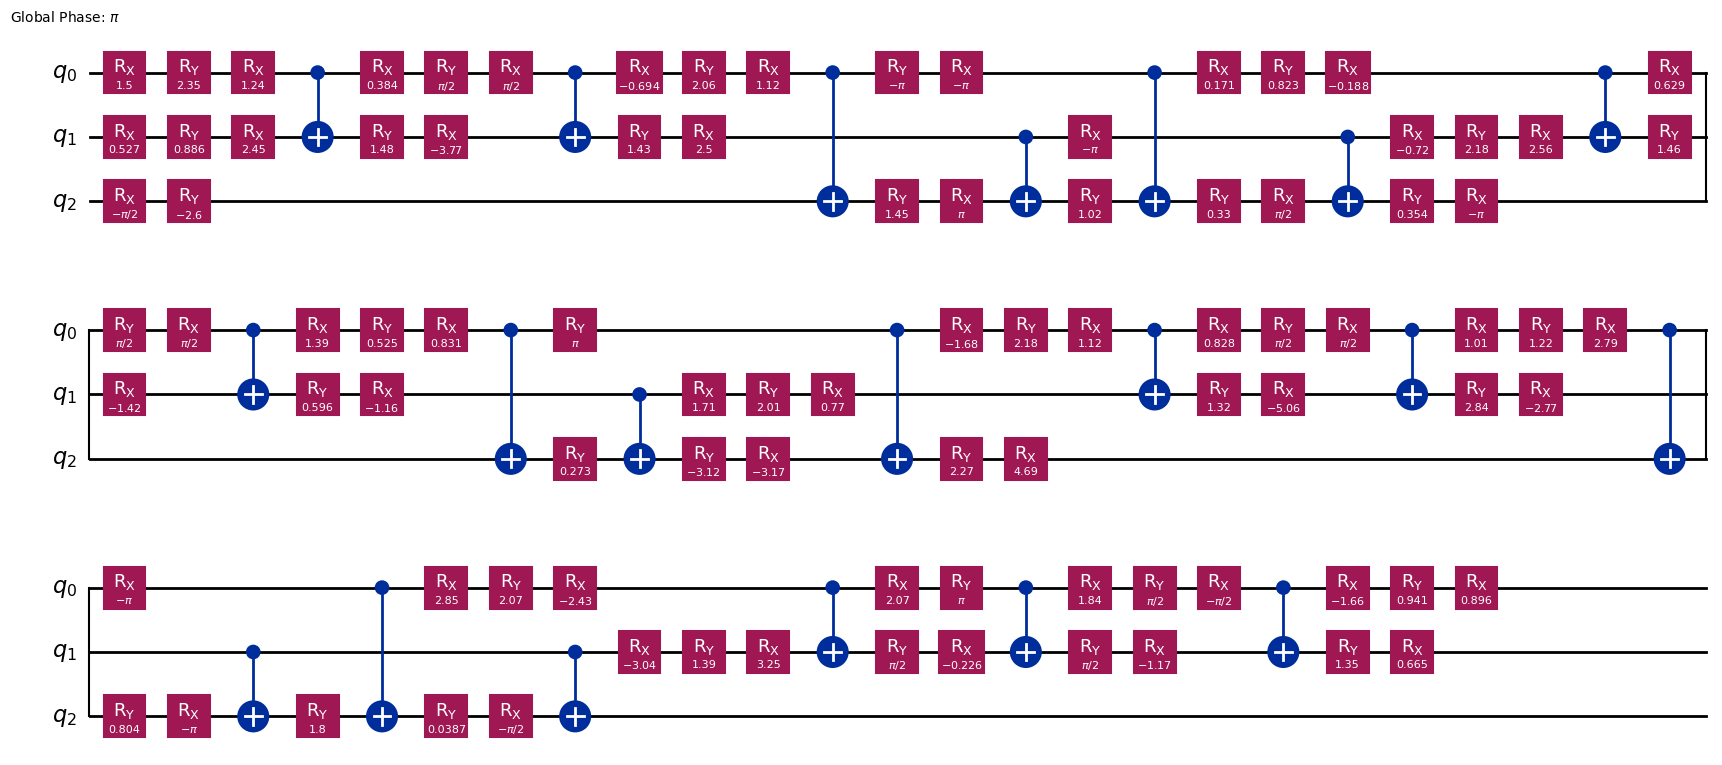

In [9]:
# decomposing any unitary matrix into single- and two-qubit gates
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.compiler import transpile

def random_unitary_matrix(n):
    # Generate a random complex matrix
    mat = np.random.randn(n, n) + 1j * np.random.randn(n, n)
    # Compute the QR decomposition
    q, r = np.linalg.qr(mat)
    # Return the unitary matrix
    return q

def quantum_shannon_decomposition(circuit, unitary_matrix, qubits):
    # Create a temporary circuit with the desired number of qubits
    temp_qubits = QuantumRegister(len(qubits))
    temp_circuit = QuantumCircuit(temp_qubits)
    # Apply the unitary operator to the temporary circuit
    temp_circuit.unitary(unitary_matrix, qubits)
    # Decompose each two-qubit gate in the temporary circuit
    # (optimization_level=3 is highest in QISKIT and IBMQ)
    decomposed_circuit = transpile(temp_circuit, basis_gates=["ry", "rx", "cx"], optimization_level = 2)
    # Apply the decomposed gates to the original circuit
    circuit.compose(decomposed_circuit, qubits, inplace=True)

# Example usage
qbits=3
qubits = [i for i in range(0, qbits)]
# Create a quantum circuit
circuit = QuantumCircuit(qbits)
# Apply the Quantum Shannon Decomposition
unitary_matrix = random_unitary_matrix(2**qbits)
quantum_shannon_decomposition(circuit, unitary_matrix, qubits)
print(dict(circuit.count_ops()))
circuit.draw('mpl')

In [13]:
import scipy
def closest_unitary(A, print_distance=True):
    """ Calculate the unitary matrix U that is closest to a general matrix A
     (with respect to the operator norm distance: ||A-U||) using SVD.
    * Prints the distance of A to unitarity: d=max|s_i - 1| (s_i=diag.entries of S)
    * Returns U as ndarray 
    """
    V, S, Wh = scipy.linalg.svd(A)
    if print_distance:
        d = np.max(np.abs(S - np.eye(len(S))))
        print("Distance of A from unitarity:", round(d,8))
    U = np.matrix(V.dot(Wh))
    return U

# examples
A=0.25 * np.array([[ 15, 9, 5, -3 ],
                   [ 9, 15, 3, -5 ],
                   [ 5, 3, 15, -9 ],
                   [ -3, -5, -9, 15 ]]) 
print(closest_unitary(A))
print(decompose_Pauli(A))

print("\n")
B = np.array([[0.5, 0, -0.5j, 0, 0, 0, 0, -0.5-0.5j],
              [0, 0.5, 0, 0.5j, 0, 0, -0.5+0.5j, 0 ],
              [0.5j, 0, 0.5, 0, 0, -0.5+0.5j, 0, 0 ],
              [0, -0.5j, 0, 0.5, -0.5-0.5j, 0, 0, 0],
              [0, 0, 0, -0.5+0.5j, 0.5, 0, 0.5j, 0 ],
              [0, 0, -0.5-0.5j, 0, 0, 0.5, 0, -0.5j],
              [0, -0.5-0.5j, 0, 0, -0.5j, 0, 0.5, 0],
              [-0.5+0.5j, 0, 0, 0, 0, 0.5j, 0, 0.5 ]])
print(closest_unitary(B))
print(decompose_Pauli(B))

Distance of A from unitarity: 8.0
[[ 1. -0.  0.  0.]
 [-0.  1. -0. -0.]
 [-0.  0.  1. -0.]
 [-0.  0.  0.  1.]]
([(3.75+0j), (1.25+0j), (0.75+0j), (2.25+0j)], ['II', 'XZ', 'YY', 'ZX'])


Distance of A from unitarity: 1.61803399
[[ 0.132-0.069j  0.183+0.102j  0.144-0.378j -0.183-0.102j -0.183-0.102j
  -0.132+0.069j  0.183+0.102j -0.591-0.517j]
 [-0.207-0.031j  0.115-0.017j  0.207+0.031j  0.162+0.464j -0.115+0.017j
   0.207+0.031j -0.609+0.431j -0.207-0.031j]
 [ 0.144+0.517j -0.183-0.102j  0.132-0.069j  0.183+0.102j  0.183+0.102j
  -0.591+0.378j -0.183-0.102j -0.132+0.069j]
 [ 0.207+0.031j  0.162-0.431j -0.207-0.031j  0.115-0.017j -0.609-0.464j
  -0.207-0.031j -0.115+0.017j  0.207+0.031j]
 [ 0.207+0.031j -0.115+0.017j -0.207-0.031j -0.609+0.431j  0.115-0.017j
  -0.207-0.031j  0.162+0.464j  0.207+0.031j]
 [-0.132+0.069j -0.183-0.102j -0.591-0.517j  0.183+0.102j  0.183+0.102j
   0.132-0.069j -0.183-0.102j  0.144-0.378j]
 [-0.207-0.031j -0.609-0.464j  0.207+0.031j -0.115+0.017j  0.162-0.431j